In [2]:
import numpy as np
import pandas as pd
import json
import time
import os.path
from os import path
import math
import datetime
import unidecode
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from IPython.display import Image

# Neural Networks: A model based on the brain
Consult this link for a detailed lesson + example:
http://neuralnetworksanddeeplearning.com/chap1.html

__Components of a Neural Network__
- Neurons
- Activation Functions
- Layers
- Weights
- Loss Function

__Training for a Neural Network__
- Gradient Descent
- Forward-propagation- for calculating weights
- Backpropagation


### Neurons 

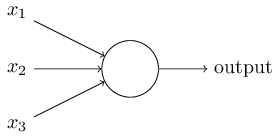

In [3]:
Image("pictures/neuronpic.png")

This is a __neuron__. It takes inputs (x_1,x_2,x_3), which are multiplied by __weights__ (w_1,w_2,w_3), and performs an __activation function__ on them, giving an output. 

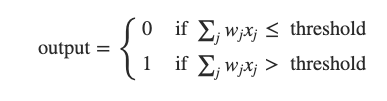

In [4]:
Image("pictures/switchfx.png")

consider this example of how a very basic neuron might work: 

 You are trying to decide whether or not to go to the festival. You might make your decision by weighing up three factors:

- Is the weather good?
- Does your friend want to accompany you?
- Is the festival near public transit?

We can represent these three factors as x_1,x_2, and x_3. For instance, we'd have x_1=1 if the weather is good, and x_1=0 if the weather is bad. We also have weights, which indicate how much you care about each factor. __w_1=2, w_2=5, w_3=2__.

If you set your threshold at 4, and have your __activation function__ as the function shown above, you can see that you would go to the festival if your friend would come, or if the weather is good, and there is public transit nearby. This simple example shows how __weights__ and __activation functions__ can impact the output a neuron would have.
    

## Activation Functions

Neural networks use __activation functions__ to introduce nonlinearity into our model, which is important because it allows us to make our model more complex than a linear one. As we say in the example above, the function we choose can have a big impact on our model. There are many activation functions to pick from, and today we will discuss __sigmoid__, one of the most popular activation functions.

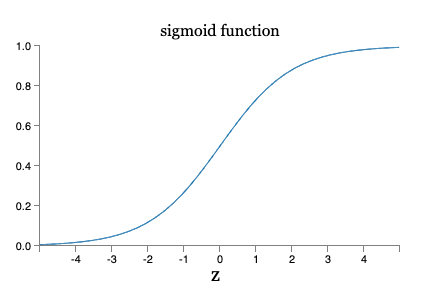

In [5]:
Image("pictures/sigmoid.png")

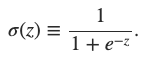

In [6]:
Image("pictures/sigmoidfx.png")

Above are the sigmoid function and its graph. The reason we use sigmoid over the threshold function in the ecample is that the smooth slope of the sigmoid function allows us to tweak and fine tune our model using a technique called __gradient descent__, which will be discussed later. The sigmoid function is also good for making sure that no particular neuron's output dominates the model, since all outputs are held between zero and 1, as shown on the graph.

## Layers

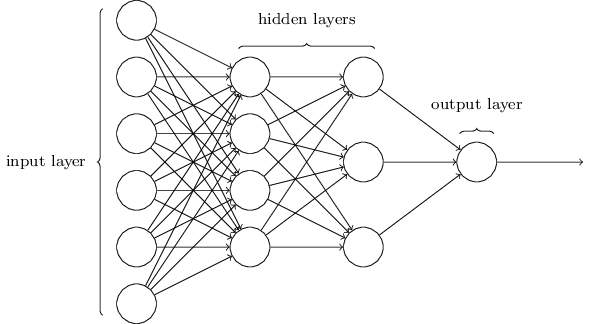

In [7]:
Image("pictures/NN.png")

Now, we put the neurons together to create a network. In the graph above, each circle is a neuron, and each arrow carries the output of one neuron to the input of another, multiplying by a weight.  The leftmost layer in this network is called the __input layer__, and the neurons within the layer are called __input neurons__. The rightmost or __output layer__ contains the __output neurons__. The middle layer is called a __hidden layer__, since the neurons in this layer are neither inputs nor outputs.

## Weights

__Weights__, as discussed previously, multiply inputs before they are passed into the next node. These add emphasis to certain outputs from nodes, and are adjusted through __learning__, which is discussed later in the notebook. The ultimate goal in tuning a model is to find the correct weights to yield the best output.

## Loss Function

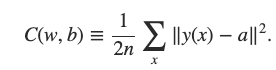

In [8]:
Image("pictures/lossfx.png")

As with other ML models, we train our model by trying to minimize the output of the __loss function__. We will do this by finding the weights that do so. Above is a basic loss function. We will achieve this throught the __gradient descent algorithm__, discussed next. 

Interesting note: The reason we need the loss function in order to tune our model is that small tweaks to weights might not actually change our output, but they do change the output of our loss function. Because of this, the outputs of our model are not a smooth curve when graphed against our weights, and can't be fine tuned. This is why we need a loss function.

# Architecture

The feedforward neural network model always contains three main parts:
1. Inputs
2. Hidden Layers
3. Output/Result(s)

We've reconstructed the image from above to mention about below!

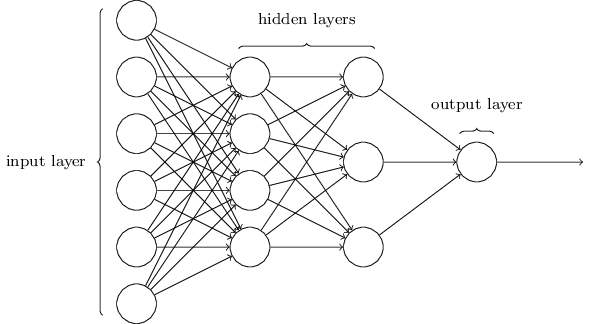

In [9]:
Image("pictures/NN.png")

This is a **3-layer, neural network** that takes 6 inputs and outputs 1 value (a similar architecture we'll be using later without our data)

As you pass through the different layers, you can visualize an input being transformed by different functions and weights (as they pass from layer to layer) until they get to the output layer.

# Training

Now that we've been able to explore all the different components in a neural network, how can we train this model to better predict our different players' stats? This process can predominantly be done in 3 major steps: **assigning weights, calculating error, and updating the weights**

## Step 1: Assigning Weights

As you can see from the different neural networks we've gotten a chance to look at, you'll see that the major components of these networks that really matter are the **weights**. Primarily with these models, finding the most optimal weights are the entire magic of the model.

So, we typically start by assigning a random set of weights, and let the rest of the training optimize these values over time.

## Step 2: Calculate Error

As we've seen with other models, we need a **loss function** to determine when our model is doing better or worse, and a way for us to derive the loss function so that we can perform algorithms like **gradient descent** to find the most optimal parameters for our weights.

For many regression problems with neural networks, we'll be focused on the **squared loss**, while in cases for classification, we might be more focused on something like **cross-entropy loss**.

### Gradient Descent

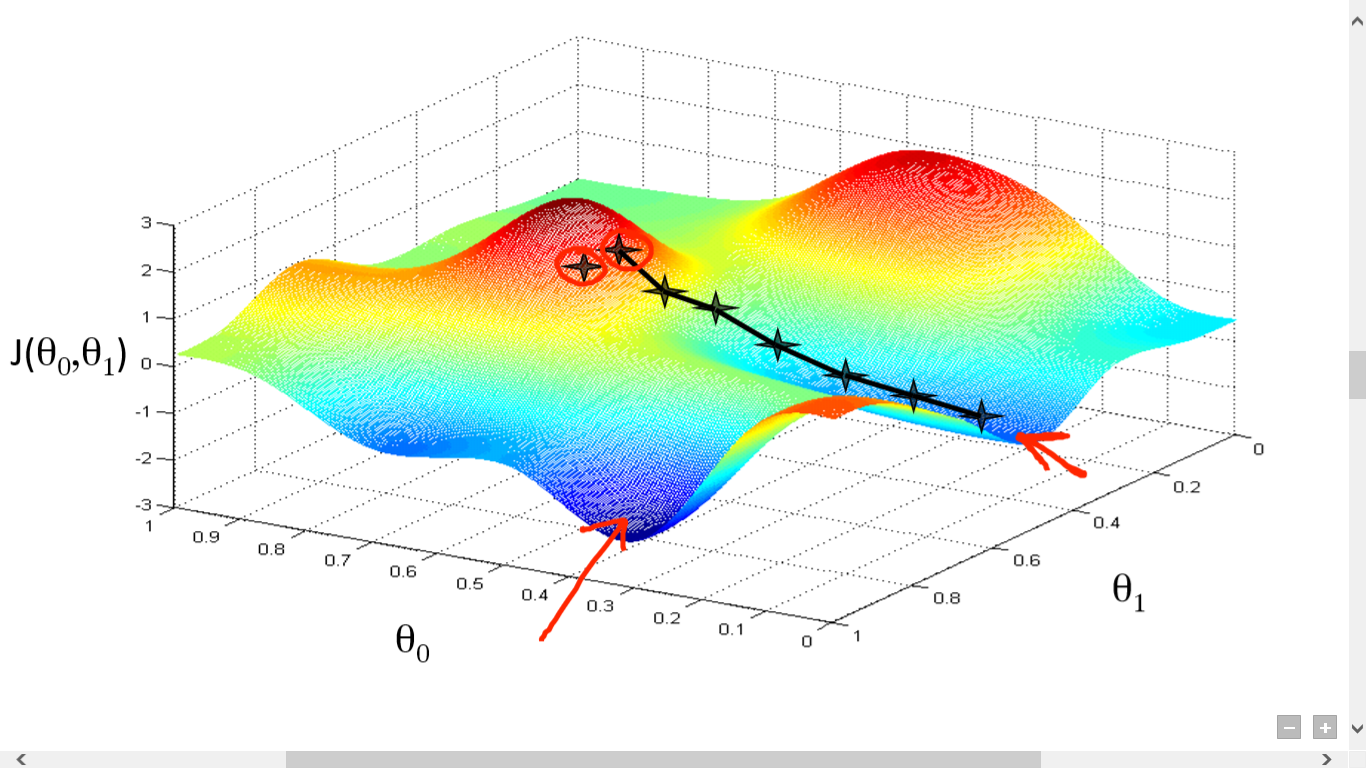

In [10]:
Image('pictures/grad_desc.png')

## Step 3: Updating Weights

After we've defined our loss function and taken its gradient, now we want to perform **gradient descent** on our different weights to optimize them. In order to conduct this gradient process effectively while also ensuring our parameters are not too dependent on each other (show image), we introduce a concept called **backpropagation**.

### Backpropagation

Backward Propagation, is one of the most popular ways in which a neural network can be trained. Backward Propagation uses training data that depicts the class of the instance as well as its elements. Backward Propagation can be summarized as the method of guessing and checking.

Every time the algorithm is run, it guesses weights to assign to every neuron, then computing what it thinks the value is. Then it checks with the actual value to readjust weights and create a better classifier. The end goal for training a neural network is to assign the weights that will result in a correct classification.

## Overall Visualization

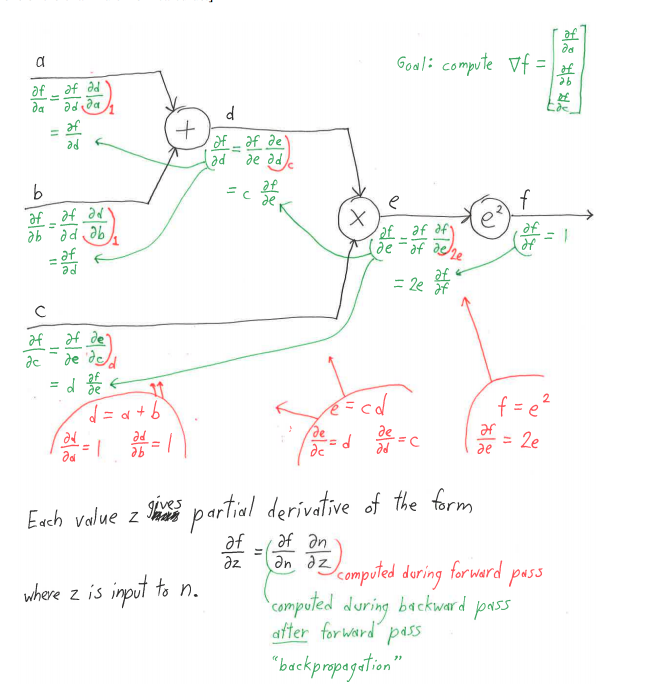

In [11]:
Image('pictures/back_prop.png')

# Let's Train Some Models!

Now, in order to see these different concepts come to life, we introduce the **MNIST** dataset, a dataset that has labelled images of different hand-written digits (from 0-9), and the neural network's job is to be able to classify what each one is. Let's take a look!

## Importing Data

In [13]:
import requests
requests.packages.urllib3.disable_warnings()
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

We are introducing a new machine learning library called **tensorflow**, which we'll see has a package **keras** that will help us immensely build our network and make our predictions!

In [14]:
!pip install tensorflow

In [16]:
import tensorflow as tf
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

## Visualizing parts of our data

In [20]:
def plot_images(images, cls_true, cls_pred=None):
    """
    Renders different images passed in and their true values.
    """
    assert len(images) == len(cls_true) == 9
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape((28, 28)), cmap='binary')
        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])
        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show();

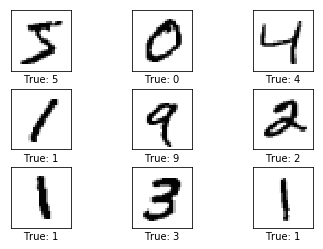

In [23]:
plot_images(X_train[0:9], y_train[0:9])

## Reshaping and cleaning our data for our model

In [ ]:
!pip install keras

In [24]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [25]:
# Reshape 2d (28x28) image data into 1d vectors (28x28 = 784-d vectors)
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

In [27]:
num_classes = 10

In [28]:
# Convert class labels into vectors. Ie 3 -> [0,0,0,1,0,0,0,0,0,0]
y_train_oe = keras.utils.to_categorical(y_train, num_classes)
y_test_oe = keras.utils.to_categorical(y_test, num_classes)

## Creating our model

In [33]:
model = Sequential()

In [40]:
model.add(Dense(60, activation='relu', input_shape=(784,)))
model.add(Dense(30, activation='relu', input_shape=(60,)))
model.add(Dense(num_classes, activation='softmax'))

In [41]:
# For a multi-class classification problem
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Training our model

In [42]:
model.fit(x=X_train, y=y_train_oe, epochs=10, batch_size=128)

Epoch 1/10
60000/60000 [==============================] - 2s 30us/step - loss: 1.1368 - accuracy: 0.5962
Epoch 2/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.3819 - accuracy: 0.9303
Epoch 3/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.3211 - accuracy: 0.9360
Epoch 4/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.2983 - accuracy: 0.9373
Epoch 5/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.2839 - accuracy: 0.9398
Epoch 6/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.2721 - accuracy: 0.9418
Epoch 7/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.2670 - accuracy: 0.9418
Epoch 8/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.2643 - accuracy: 0.9429
Epoch 9/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.2537 - accuracy: 0.9449
Epoch 10/10
60000/60000 [==============================

## Validation accuracy

In [43]:
result = model.evaluate(x=X_test, y=y_test_oe)
print("Evaluation error: %f \nTest accuracy: %f" % (result[0], result[1] * 100))

10000/10000 [==============================] - 0s 36us/step
Evaluation error: 0.277354 
Test accuracy: 94.069999


## Making test predictions

In [44]:
y_pred = model.predict(x=X_test)

In [48]:
cls_pred = np.argmax(y_pred, axis=1)
print(cls_pred[:5])

[7 2 1 0 4]


We can also take a look at the different images that didn't work (and see visually how off our model might've been).

In [56]:
def plot_example_errors(cls_pred):
    # cls_pred is an array of the predicted class-number for all images in the test-set.
    # Boolean array whether the predicted class is incorrect.
    incorrect = (cls_pred != y_test)
    # Get the images from the test-set that have been
    # incorrectly classified.
    images = X_test[incorrect]
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]
    # Get the true classes for those images.
    cls_true = y_test[incorrect]
    # Plot the first 9 images.
    for i in range(0, 100, 9):
        plot_images(images=images[i:i+9],
                    cls_true=cls_true[i:i+9],
                    cls_pred=cls_pred[i:i+9])

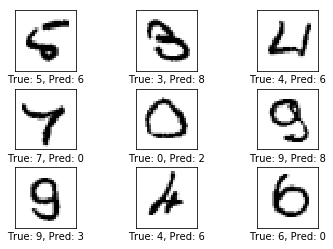

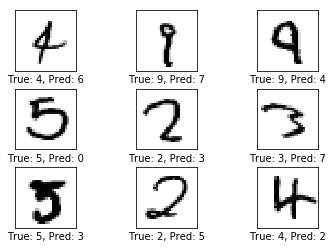

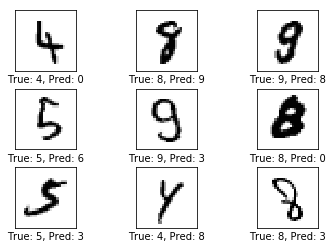

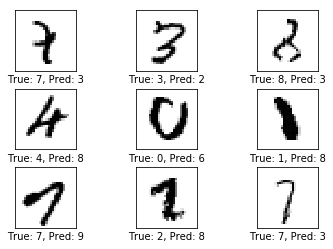

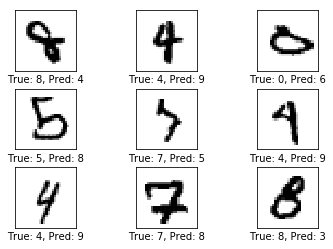

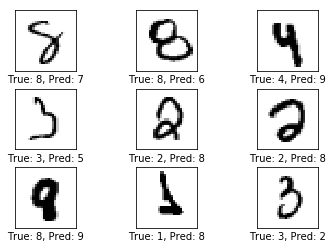

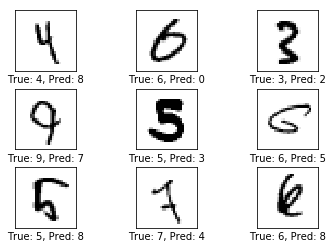

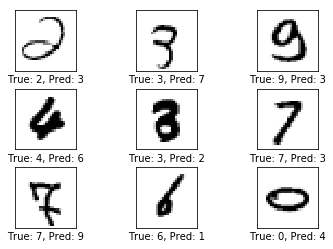

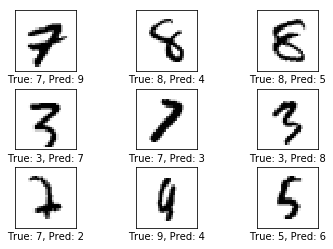

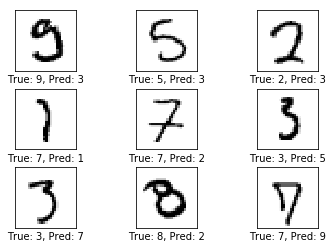

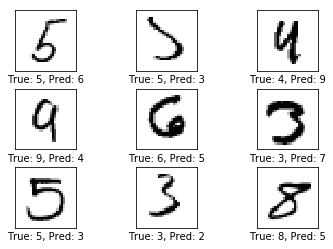

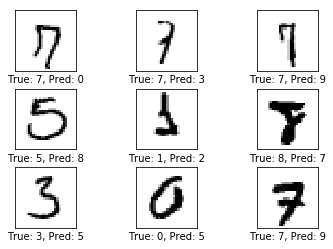

In [57]:
plot_example_errors(cls_pred)

# DIY

In [58]:
# Train model on your dataset here!